In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, curve_fit
import math

*1. Determine the sample size and $\sigma$*

In [2]:
N_size = 10
sigma = 0.3

*2. Get a randomized training data set from $0$ to $1$ for $x$, $\sin(2\pi x)$ for $y$, and Gaussian noise added to $y$.*

In [3]:
x_data = np.random.uniform(0, 1, N_size)
x_data2 = np.random.uniform(0, 1, N_size*10)
x_data3 = np.random.uniform(0, 1, N_size*100)

y_data = np.sin(2 * math.pi * x_data) + np.random.normal(loc=0, scale=sigma, size=N_size)
y_data2 = np.sin(2 * math.pi * x_data2) + np.random.normal(loc=0, scale=sigma, size=N_size*10)
y_data3 = np.sin(2 * math.pi * x_data3) + np.random.normal(loc=0, scale=sigma, size=N_size*100)

##### a) Introductory Activity: Plot the data set for N = 10, 100, and 1000.

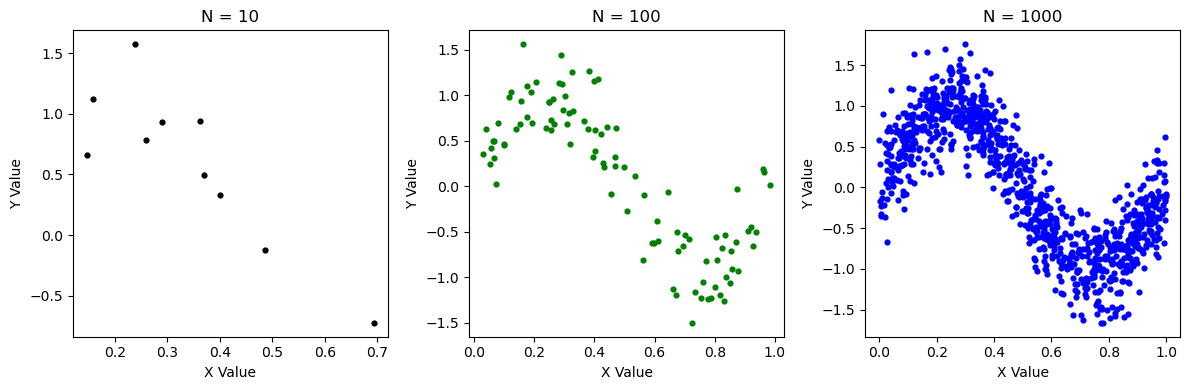

In [4]:
plt.figure(figsize=(12, 4)) 

plt.subplot(1, 3, 1)
plt.scatter(x_data, y_data, color='black', s=12, alpha=1, label='N = 10')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('N = 10')

# Center Plot
plt.subplot(1, 3, 2)
plt.scatter(x_data2, y_data2, color='green', s=12, alpha=1, label='N = 100')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('N = 100')

# Right Plot
plt.subplot(1, 3, 3)
plt.scatter(x_data3, y_data3, color='blue', s=12, alpha=1, label='N = 1000')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('N = 1000')

plt.tight_layout()
plt.show()

##### b) Polynomial fitting curves with M = 0, 1, 3, and 9. 

/tmp/xpython_42/1995728839.py:21: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(M9_model, x_data, y_data, p0=[0.0]*10)


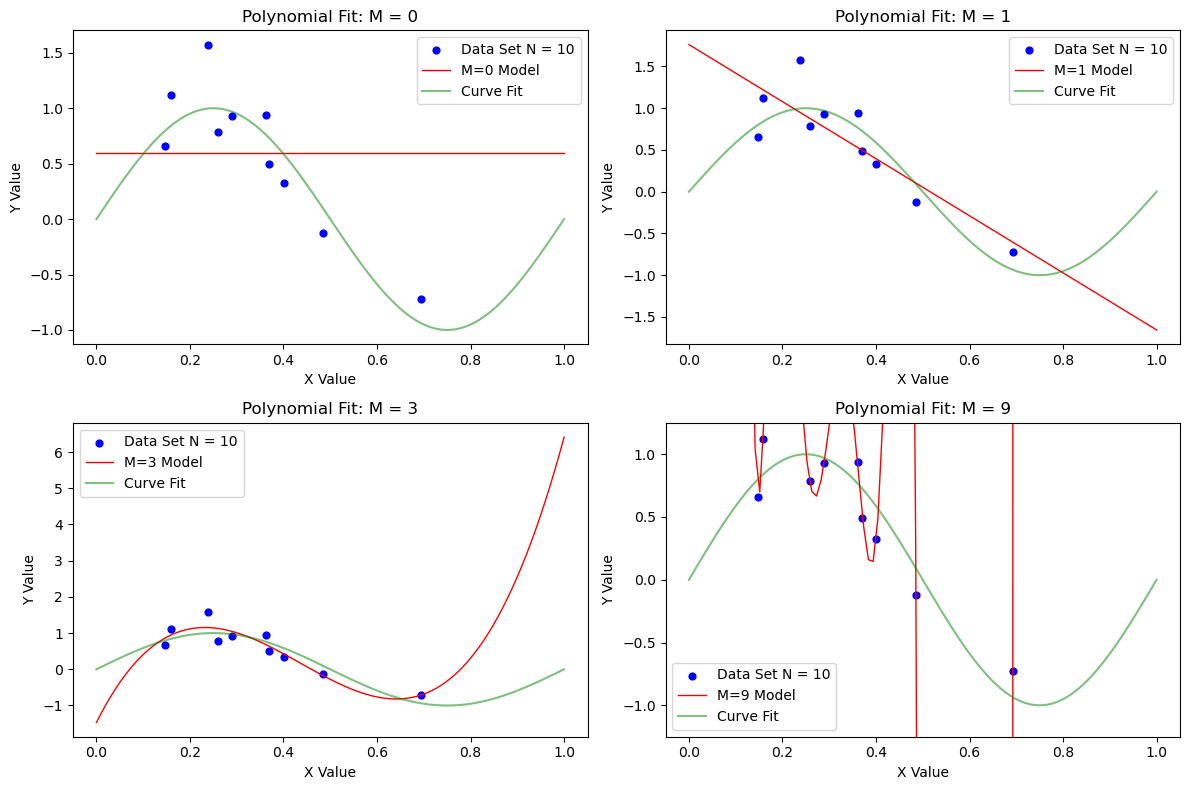

In [5]:
x_smooth = np.linspace(0, 1, 100)

def M0_model(x, b):
    return np.full_like(x, b)   
# fitting 
popt, _ = curve_fit(M0_model, x_data, y_data, p0=[0])
y_fit0 = M0_model(x_smooth, *popt)

def M1_model(x, a, b):
    return a * x + b
popt, _ = curve_fit(M1_model, x_data, y_data, p0=[0,0])
y_fit1 = M1_model(x_smooth, *popt)

def M3_model(x, a, b, c, d):
    return a * x ** 3 + b * x ** 2 + c * x + d
popt, _ = curve_fit(M3_model, x_data, y_data, p0=[0.0]*4)
y_fit3 = M3_model(x_smooth, *popt)

def M9_model(x, a, b, c, d, e, f, g, h, i, j):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6 + h*x**7 + i*x**8 + j*x**9
popt, _ = curve_fit(M9_model, x_data, y_data, p0=[0.0]*10)
y_fit9 = M9_model(x_smooth, *popt)

# plot
plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
plt.scatter(x_data, y_data, color = 'blue', s=24, label='Data Set N = 10')
plt.plot(x_smooth, y_fit0, color='red', linewidth=1, label='M=0 Model')
plt.plot(x_smooth, np.sin(2 * np.pi * x_smooth), 'g-', alpha=0.5, label='Curve Fit')
plt.title('Polynomial Fit: M = 0')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(x_data, y_data, color = 'blue', s=24, label='Data Set N = 10')
plt.plot(x_smooth, y_fit1, color='red', linewidth=1, label='M=1 Model')
plt.plot(x_smooth, np.sin(2 * np.pi * x_smooth), 'g-', alpha=0.5, label='Curve Fit')
plt.title('Polynomial Fit: M = 1')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(x_data, y_data, color = 'blue', s=24, label='Data Set N = 10')
plt.plot(x_smooth, y_fit3, color='red', linewidth=1, label='M=3 Model')
plt.plot(x_smooth, np.sin(2 * np.pi * x_smooth), 'g-', alpha=0.5, label='Curve Fit')
plt.title('Polynomial Fit: M = 3')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.legend()

plt.subplot(2,2,4)
plt.ylim(-1.25, 1.25) #normalize the plot
plt.scatter(x_data, y_data, color = 'blue', s=24, label='Data Set N = 10')
plt.plot(x_smooth, y_fit9, color='red', linewidth=1, label='M=9 Model')
plt.plot(x_smooth, np.sin(2 * np.pi * x_smooth), 'g-', alpha=0.5, label='Curve Fit')
plt.title('Polynomial Fit: M = 9')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.legend()

plt.tight_layout()
plt.show()

# print(f"Fit Equation: y = {popt[0]:.2f}x + {popt[1]:.2f}")

### Write Up (Discussion)
---
b)
1. Comparing the above results with Figure 1.4 in the textbook: for M = 0 and 1, the model plots are very much like what we have in the textbook but are off the trending of the data set.
2. For M = 3, we can tell by eye that the model fitting plot is much closer to the curve fit (green line). Though, it starts to look different from the plot in the textbook.
3. For M = 9, my model fitting plot is very different from that in the textbook. This could be due to that I have not done Regularization or due to the non-accuracy of overfitting.

#### Subquestions: 

a. Starting with M = 0, we got a straight line and it's under fitting. For M = 1, the fitting begins to follow the trending of our data set, but it is still under fittting regarding the curved parts of our data set. Then, when we use the $3^{\text{rd}}$ order of $x$ model to fit our data, it spits out much better results as the fitting catches most of the features of our data plot. Lastly, for the $9^{\text{th}}$ order of $x$ model fitting we can observe some overfitting here. The observation is that as we increase the polynomial order from M = 0, our model fitting gets better until it reaches a "sweet spot" order (in this case, M = 3). Then, the model fitting quality decreases as we continue increasing the polynomial order, which can be observed in M = 9 case. 

b. Please see the results below. 

In [12]:
sizeb = 100
sigma_noiseb = 0.3

# M = 9 redef
def M9_model9(x, a, b, c, d, e, f, g, h, i, j):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6 + h*x**7 + i*x**8 + j*x**9

# Data Set for size = 100
x_data9 = np.random.uniform(0, 1, 100)
y_data9 = np.sin(2*math.pi*x_data9)+ np.random.normal(loc=0, scale=sigma_noiseb, size=sizeb)

# Fit the curve
popt, pcov = curve_fit(M9_model9, x_data9, y_data9, p0=[0.0]*10)

In [13]:
# Compute E(w)
# y_fit_at_data represents y(x_n, w) and y_data represents t_n
y_fit_at_data = M9_model9(x_data9, *popt)
e_wb = 1/2 * np.sum((y_fit_at_data - y_data9)**2)

# Compute E_rms
e_rmsb = np.sqrt(2 * e_wb / sizeb)

# Compare the results
print(f"Sum of Squares Error E(w): {e_wb:.4f}")
print(f"Root-Mean-Square Error E_rms: {e_rmsb:.4f}")

# Print the Sigmas (uncertainty) of each parameter
perr = np.sqrt(np.diag(pcov))
print("\nSigma (standard deviation) for each parameter a-i:")
for i, s in enumerate(perr):
    print(f" Sigma_{chr(97+i)}: {s:.4f}")

Sum of Squares Error E(w): 3.4215
Root-Mean-Square Error E_rms: 0.2616

Sigma (standard deviation) for each parameter a-i:
 Sigma_a: 0.4452
 Sigma_b: 22.0669
 Sigma_c: 383.4123
 Sigma_d: 3158.7989
 Sigma_e: 14301.9512
 Sigma_f: 38258.5647
 Sigma_g: 61997.2681
 Sigma_h: 59739.4899
 Sigma_i: 31469.0400
 Sigma_j: 6973.5174


b. <br>
Comparing the given $\sigma$ with the $E_{RMS}$: $\sigma$ = 0.3 for generating our noise and $E_{RMS}$ ~ 0.29, which is pretty close $ (0.3 - 0.29) / 0.29 = 3.4\% $
<br>
Comparing the $\sigma$ from each parameter with the $E_{RMS}$: $\sigma_a$ ~ 0.2, which is $ (0.2 - 0.29) / 0.29 = 31\% $, and it is the closest number compared to all other $\sigma$. 

c. <br>
See the plot below. 

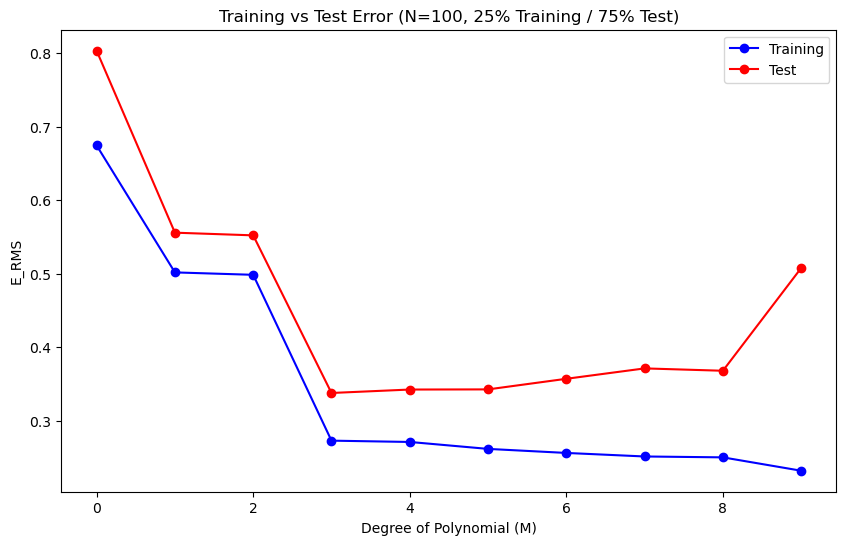

In [16]:
# Redefine to ensure the size is 100 (not sure why the previous def didn't work)
sizec = 100
sigma_noisec = 0.3

x_datac = np.random.uniform(0, 1, sizec)
y_datac = np.sin(2 * math.pi * x_datac) + np.random.normal(0, sigma_noisec, sizec)

# Split (25% for training = 25 points, 75% for test = 75 points)
indices = np.random.permutation(sizec)
train_idx, test_idx = indices[:25], indices[25:]

x_train, y_train = x_datac[train_idx], y_datac[train_idx]
x_test, y_test = x_datac[test_idx], y_datac[test_idx]

# Fit models and calculate RMSE for M = 0 to 9
M_values = range(0, 10)
rmse_train = []
rmse_test = []

for M in M_values:
    # get coefficients
    coeffs = np.polyfit(x_train, y_train, M)
    
    # Evaluate predictions
    y_train_pred = np.polyval(coeffs, x_train)
    y_test_pred = np.polyval(coeffs, x_test)
    
    # Calculate RMSE
    rmse_train.append(np.sqrt(np.mean((y_train - y_train_pred)**2)))
    rmse_test.append(np.sqrt(np.mean((y_test - y_test_pred)**2)))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(M_values, rmse_train, 'o-', color='blue', label='Training')
plt.plot(M_values, rmse_test, 'o-', color='red', label='Test')

plt.xlabel('Degree of Polynomial (M)')
plt.ylabel('E_RMS')
plt.title('Training vs Test Error (N=100, 25% Training / 75% Test)')
plt.legend()

plt.show()